### MACHINE LEARNING PROJECT I

#### TEAM MEMBERS: ASLI YORUSUN - ERDEM BOCUGOZ - SERIF SONER SERBEST

In [26]:
# Useful starting lines
%matplotlib inline
import numpy as np
import datetime
import matplotlib.pyplot as plt

from proj1_helpers import *
from implementations import *
from test import *
from data_cleaning import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
prediction,data,id_ = load_csv_data("train.csv", sub_sample=True)

### Data Cleaning & Standardization

In [28]:
data = clean_data(data)

In [29]:
x,mean_x,std_x = standardize(data)
y,tx = build_model_data(prediction,x)

In [34]:
y.shape, tx.shape

((5000,), (5000, 31))

### Gradient Descent

In [35]:
# Define the parameters of the algorithm.
max_iters = 5
gamma = 0.005

# Initialization
w_initial = np.zeros(tx.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/4): loss=0.5
Gradient Descent(1/4): loss=0.49285829041712204
Gradient Descent(2/4): loss=0.4871497783345379
Gradient Descent(3/4): loss=0.48255009590766684
Gradient Descent(4/4): loss=0.4788089721413071
Gradient Descent: execution time=0.002 seconds


### Stochastic Gradient Descent

In [36]:
# Define the parameters of the algorithm.
max_iters = 5
gamma = 0.005
batch_size = 1

# Initialization
w_initial = np.zeros(tx.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/4): loss=0.4805887538042158
SGD(1/4): loss=0.4702982649218755
SGD(2/4): loss=0.4667883616244574
SGD(3/4): loss=0.4667916973085463
SGD(4/4): loss=0.47031455925477406
SGD: execution time=0.006 seconds


### Least Squares

In [37]:
weights = least_squares(y, tx)
# compute RMSE
mse = compute_loss(y, tx, weights)
rmse = np.sqrt(2 * mse)

print("Least Squares, rmse={loss}".format(loss=rmse)) 

Least Squares, rmse=0.8091463871124583


### Ridge Regression

proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.717, Testing RMSE=4.300
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.717, Testing RMSE=4.282
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.717, Testing RMSE=4.267
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.717, Testing RMSE=4.254
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.717, Testing RMSE=4.237
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.717, Testing RMSE=4.209
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.717, Testing RMSE=4.160
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.717, Testing RMSE=4.077
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.718, Testing RMSE=3.942
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.718, Testing RMSE=3.729
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.718, Testing RMSE=3.430
proportion=0.9, degree=10, lambda=0.000, Training RMSE=0.719, Testing RMSE=3.033
proportion=0.9, degree=10, l

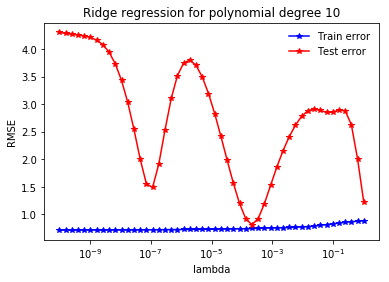

In [46]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-10, 0, 50)
    # split data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    # ridge regression with different lambda
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression
        weight = ridge_regression(y_tr, tx_tr, lambda_)
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, tx_tr, weight)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, tx_te, weight)))

        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)
    
seed = 1
degree = 10
split_ratio = 0.9
ridge_regression_demo(x, y, degree, split_ratio, seed)

### Cross Validation

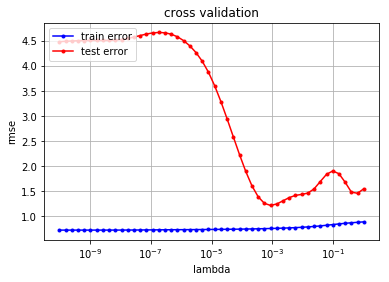

In [47]:
def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-10, 0, 50)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression
        for k in range(4):
            [a,b] = cross_validation(y,x,k_indices,k,lambda_,degree)
            rmse_tr.append(a)
            rmse_te.append(b)
    rmse_tr = np.asarray(rmse_tr).reshape(-1,4)
    rmse_te = np.asarray(rmse_te).reshape(-1,4)
    rmse_tr = np.mean(rmse_tr,axis=1)
    rmse_te = np.mean(rmse_te,axis=1)
    # cross validation: TODO
    # ***************************************************   
    cross_validation_visualization(lambdas,rmse_tr,rmse_te)
cross_validation_demo()